# Session 3 Homework
Machine Learning Classification - Logistic Regression Model

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv 

--2022-09-26 01:58:24--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M   324KB/s    in 4.5s    

2022-09-26 01:58:30 (311 KB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
# get and load data
df = pd.read_csv('housing.csv')

In [4]:
df.sample(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7702,-118.13,33.96,36.0,1933.0,341.0,958.0,335.0,4.4732,266000.0,<1H OCEAN
3256,-120.13,35.87,26.0,48.0,8.0,13.0,8.0,2.3750,71300.0,INLAND
809,-122.04,37.62,35.0,1032.0,173.0,453.0,176.0,6.3960,208500.0,NEAR BAY
13846,-117.35,34.50,10.0,2163.0,392.0,1174.0,362.0,3.3750,98000.0,INLAND
6924,-118.07,34.01,38.0,2245.0,444.0,1540.0,419.0,3.7986,171000.0,<1H OCEAN
8596,-118.37,33.89,21.0,2696.0,548.0,1142.0,473.0,5.6091,356800.0,<1H OCEAN
3139,-118.17,34.87,9.0,1507.0,293.0,761.0,278.0,3.0184,87900.0,INLAND
6272,-117.94,34.03,35.0,1499.0,289.0,1112.0,268.0,3.8300,149000.0,<1H OCEAN


### Data preparation

In [5]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14306,-117.14,32.71,52.0,800.0,313.0,1337.0,282.0,1.5594,87500.0,NEAR OCEAN
7880,-118.11,33.87,15.0,3254.0,598.0,1772.0,618.0,5.0417,240800.0,<1H OCEAN
1958,-120.81,38.73,42.0,1276.0,260.0,799.0,259.0,2.7273,128600.0,INLAND
282,-122.13,37.77,24.0,2459.0,317.0,916.0,324.0,7.0712,293000.0,NEAR BAY
4723,-118.37,34.05,41.0,2369.0,544.0,1252.0,522.0,2.9883,296100.0,<1H OCEAN


In [6]:
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
            'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

In [7]:
df = df[features]

In [8]:
df.sample(10)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11042,33.81,-117.82,19.0,2556.0,304.0,822.0,260.0,9.9055,456900.0,<1H OCEAN
17717,37.35,-121.75,18.0,1947.0,250.0,605.0,184.0,8.1871,500001.0,<1H OCEAN
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
3387,34.24,-118.33,31.0,6434.0,1188.0,3540.0,1131.0,4.2639,293300.0,<1H OCEAN
16452,38.13,-121.27,52.0,1081.0,257.0,437.0,225.0,2.1979,114100.0,INLAND
5935,34.15,-117.87,24.0,5745.0,735.0,2061.0,679.0,8.2827,451400.0,INLAND
5449,34.00,-118.42,31.0,1930.0,456.0,1002.0,410.0,3.9798,458600.0,<1H OCEAN
17695,37.29,-121.83,10.0,1828.0,453.0,1356.0,409.0,4.5943,123500.0,<1H OCEAN
20229,34.27,-119.30,17.0,1527.0,503.0,688.0,423.0,1.6007,187500.0,NEAR OCEAN
5309,34.05,-118.44,15.0,5368.0,1312.0,2269.0,1232.0,5.7097,316700.0,<1H OCEAN


In [9]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df = df.fillna(0)

In [11]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df['population_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [13]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_household,bedrooms_per_room,rooms_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,6.984127
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,6.238137
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,8.288136
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,5.817352
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,6.281853


### Question 1
What is the most frequent observation (mode) for the column `ocean_proximity`?

In [14]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

**`<1H OCEAN` is the most frequent observation (mode) for the column `ocean_proximity`**

### Question 2 

In [16]:
df.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
population_per_household    float64
bedrooms_per_room           float64
rooms_per_household         float64
dtype: object

In [17]:
numerical = list(df.dtypes[df.dtypes == 'float64'].index)
numerical

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'population_per_household',
 'bedrooms_per_room',
 'rooms_per_household']

In [18]:
df[numerical].corr().unstack().sort_values(ascending=False)

latitude                  latitude                    1.000000
longitude                 longitude                   1.000000
rooms_per_household       population_per_household    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
population_per_household  rooms_per_household         1.000000
                                                        ...   
bedrooms_per_room         rooms_per_household        -0.387465
                          median_income              -0.573836
median_income             bedrooms_per_room          -0.573836
longitude                 latitude                   -0.924664
latitude                  longitude                  -0.924664
Length: 144, dtype: float64

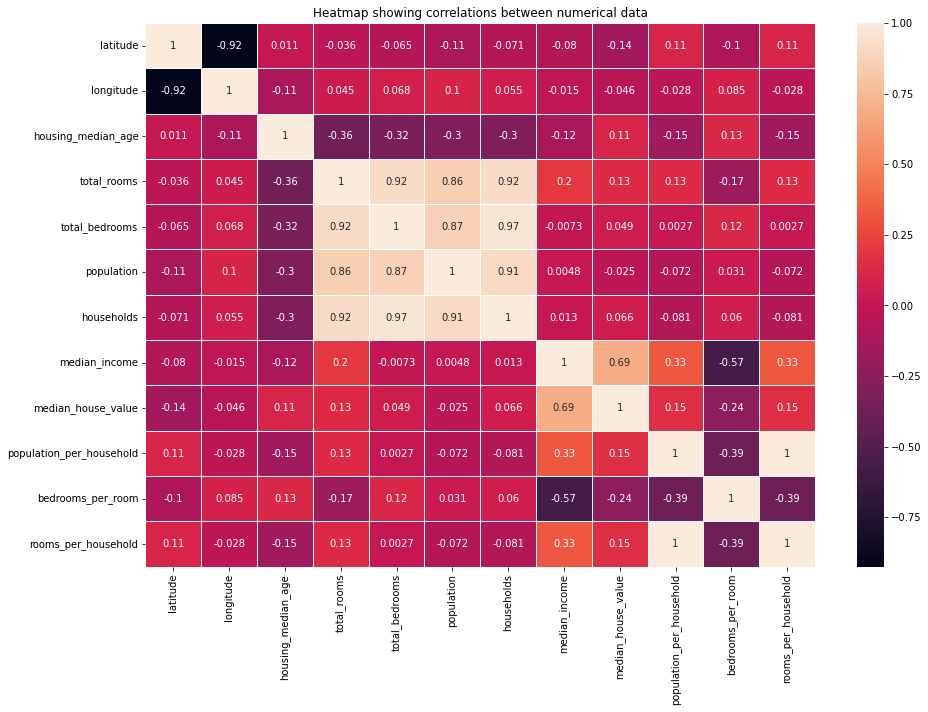

In [21]:
plt.figure(figsize=(15,10))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5)
plt.title('Heatmap showing correlations between numerical data')
plt.show()

**Plot shows that total_bedrooms and households that have the highest correlation**

In [22]:
mean_for_house_val = df['median_house_value'].mean()
mean_for_house_val

206855.81690891474

In [23]:
df['above_average'] = (df['median_house_value'] > mean_for_house_val).astype(int)
df.sample(8)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_household,bedrooms_per_room,rooms_per_household,above_average
3750,34.18,-118.38,27.0,4834.0,1527.0,3847.0,1432.0,2.1449,165300.0,<1H OCEAN,3.375698,0.315887,3.375698,0
5043,33.98,-118.33,30.0,3112.0,931.0,2739.0,841.0,1.6531,118500.0,<1H OCEAN,3.700357,0.299165,3.700357,0
9601,37.30,-120.48,49.0,2919.0,719.0,1956.0,679.0,1.5427,88500.0,INLAND,4.298969,0.246317,4.298969,0
4220,34.12,-118.28,50.0,2384.0,312.0,836.0,337.0,12.8763,500001.0,<1H OCEAN,7.074184,0.130872,7.074184,1
9353,37.95,-122.56,34.0,2677.0,411.0,933.0,410.0,6.1444,500001.0,NEAR OCEAN,6.529268,0.153530,6.529268,1
4989,34.00,-118.31,47.0,1551.0,362.0,1329.0,322.0,1.9792,116400.0,<1H OCEAN,4.816770,0.233398,4.816770,0
2357,36.82,-119.64,14.0,4872.0,656.0,2085.0,617.0,5.6739,173800.0,INLAND,7.896272,0.134647,7.896272,0
5581,33.83,-118.31,27.0,2880.0,802.0,2083.0,727.0,2.9619,223400.0,<1H OCEAN,3.961486,0.278472,3.961486,1


Spliting the data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [25]:
# remove median_house_val from data frame
del df['median_house_value']

In [26]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [27]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,population_per_household,bedrooms_per_room,rooms_per_household,above_average
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.922460,1
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,7.564516,1
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,3.908012,0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,5.201093,1
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,7.010127,1


In [30]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [31]:
# drop target column
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [32]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,population_per_household,bedrooms_per_room,rooms_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.922460
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,7.564516
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,3.908012
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,5.201093
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,7.010127


### Question 3

In [33]:
mi_score = round(mutual_info_score(df_full_train.above_average, df_full_train.ocean_proximity), 2)
mi_score

0.1

The MI Score is **0.10**

### Question 4
Train model and get val accuracy

In [34]:
# perfrom linear regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [35]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [36]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [37]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [38]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [39]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [40]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [41]:
model.intercept_[0]

-0.6712090755926151

In [42]:
w = model.coef_[0]
w

array([ 2.06679629e+00,  4.08720511e-03,  3.74860439e-02,  1.52342709e-01,
        9.72169582e-02,  1.25782539e+00,  2.99706035e-01, -1.97123016e+00,
        2.20735497e-01, -7.91200552e-02,  8.58699608e-01, -1.61745306e-03,
        4.95629293e-04,  4.95629293e-04,  1.47244505e-03, -9.64004446e-05])

In [43]:
dict(zip(dv.get_feature_names_out(), w))

{'bedrooms_per_room': 2.066796294892757,
 'households': 0.004087205110204339,
 'housing_median_age': 0.037486043944174326,
 'latitude': 0.15234270859927201,
 'longitude': 0.09721695816812888,
 'median_income': 1.257825389439244,
 'ocean_proximity=<1H OCEAN': 0.29970603514751915,
 'ocean_proximity=INLAND': -1.9712301607941782,
 'ocean_proximity=ISLAND': 0.22073549711454327,
 'ocean_proximity=NEAR BAY': -0.07912005516647481,
 'ocean_proximity=NEAR OCEAN': 0.8586996081054602,
 'population': -0.0016174530645548647,
 'population_per_household': 0.0004956292926459088,
 'rooms_per_household': 0.0004956292926459088,
 'total_bedrooms': 0.0014724450546622324,
 'total_rooms': -9.640044455545786e-05}

In [44]:
y_pred = model.predict_proba(X_val)[:, 1]

In [45]:
above_average = (y_pred >= 0.5)
above_average

array([False, False,  True, ...,  True,  True, False])

In [46]:
original_accuracy = accuracy_score(y_val, y_pred >= 0.5).round(2)
original_accuracy

0.84

The accuracy score is **0.84**

### Question 5


In [47]:
n_features = list(df.columns)[:-1]
n_features

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'population_per_household',
 'bedrooms_per_room',
 'rooms_per_household']

In [48]:
df_train_c = df_train.copy()
del df_train_c['ocean_proximity']

In [49]:
df_train_c.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,population_per_household,bedrooms_per_room,rooms_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.922460
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,7.564516
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,3.908012
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,5.201093
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,7.010127


In [50]:
train_dict_c = df_train_c.to_dict(orient='records')
dv_c = DictVectorizer(sparse=False)
X_train_c = dv_c.fit_transform(train_dict_c)

In [51]:
dv_c.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [52]:
df_val_c = df_val.copy()
del df_val_c['ocean_proximity']

In [53]:
val_dict_c = df_val_c.to_dict(orient='records')
X_val_c = dv_c.transform(val_dict_c)

In [54]:
model_c = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_c.fit(X_train_c, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [55]:
y_pred_c = model_c.predict_proba(X_val_c)[:, 1]

In [56]:
accuracy_score(y_val, y_pred_c >= 0.5).round(2)

0.82

In [57]:
def train_model(df_train, df_val, feature):
    # make a copy and delete the feature
    df_train_c = df_train.copy()
    del df_train_c[feature]
    
    # convert to dictionaries
    train_dict_c = df_train_c.to_dict(orient='records')
    dv_c = DictVectorizer(sparse=False)
    X_train_c = dv_c.fit_transform(train_dict_c)
    
    df_val_c = df_val.copy()
    del df_val_c[feature]
    
    val_dict_c = df_val_c.to_dict(orient='records')
    X_val_c = dv_c.transform(val_dict_c)
    
    model_c = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model_c.fit(X_train_c, y_train)
    
    y_pred_c = model_c.predict_proba(X_val_c)[:, 1]
    score = accuracy_score(y_val, y_pred_c >= 0.5).round(2)
    print("{} has an accuracy of {}".format(feature, score) )
    difference = score - original_accuracy
    return difference

In [58]:
for feature in n_features:
    score = train_model(df_train, df_val, feature)
    print('Feature "{}" has been removed accuracy of model is now = {}'.format(feature, score.round(4)))

latitude has an accuracy of 0.83
Feature "latitude" has been removed accuracy of model is now = -0.01
longitude has an accuracy of 0.83
Feature "longitude" has been removed accuracy of model is now = -0.01
housing_median_age has an accuracy of 0.83
Feature "housing_median_age" has been removed accuracy of model is now = -0.01
total_rooms has an accuracy of 0.84
Feature "total_rooms" has been removed accuracy of model is now = 0.0
total_bedrooms has an accuracy of 0.84
Feature "total_bedrooms" has been removed accuracy of model is now = 0.0
population has an accuracy of 0.82
Feature "population" has been removed accuracy of model is now = -0.02
households has an accuracy of 0.83
Feature "households" has been removed accuracy of model is now = -0.01
median_income has an accuracy of 0.79
Feature "median_income" has been removed accuracy of model is now = -0.05
ocean_proximity has an accuracy of 0.82
Feature "ocean_proximity" has been removed accuracy of model is now = -0.02
population_per

**Excluding the last 3 features, the least is *total_rooms***

### Question 6
Train Linear Regression Model

In [59]:
# get libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [60]:
df = pd.read_csv('housing.csv')

In [61]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
df['median_house_value']=np.log1p(df['median_house_value'])
df.median_house_value

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [63]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


In [64]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [65]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [66]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [67]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,12.394215,<1H OCEAN
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,13.122367,NEAR OCEAN
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,11.068215,INLAND
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,12.532498,<1H OCEAN
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,12.940844,NEAR OCEAN


In [68]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [69]:
df_train = df_train.drop('median_house_value', axis=1)
df_val = df_val.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)

In [70]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [71]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [72]:
for a in  [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print('Reglarization parameter: {} and rmse is {}'.format(a, score.round(3)))
    

Reglarization parameter: 0 and rmse is 0.525
Reglarization parameter: 0.01 and rmse is 0.525
Reglarization parameter: 0.1 and rmse is 0.525
Reglarization parameter: 1 and rmse is 0.525
Reglarization parameter: 10 and rmse is 0.525


Since all of them are the same, we pick **0** 